In [1]:
from read_mem import *
import matplotlib.pyplot as plt
import pathlib
from parse import parse
import json

In [2]:
def func(x, a, b,):

    return a * x + b

Total number of log files 2


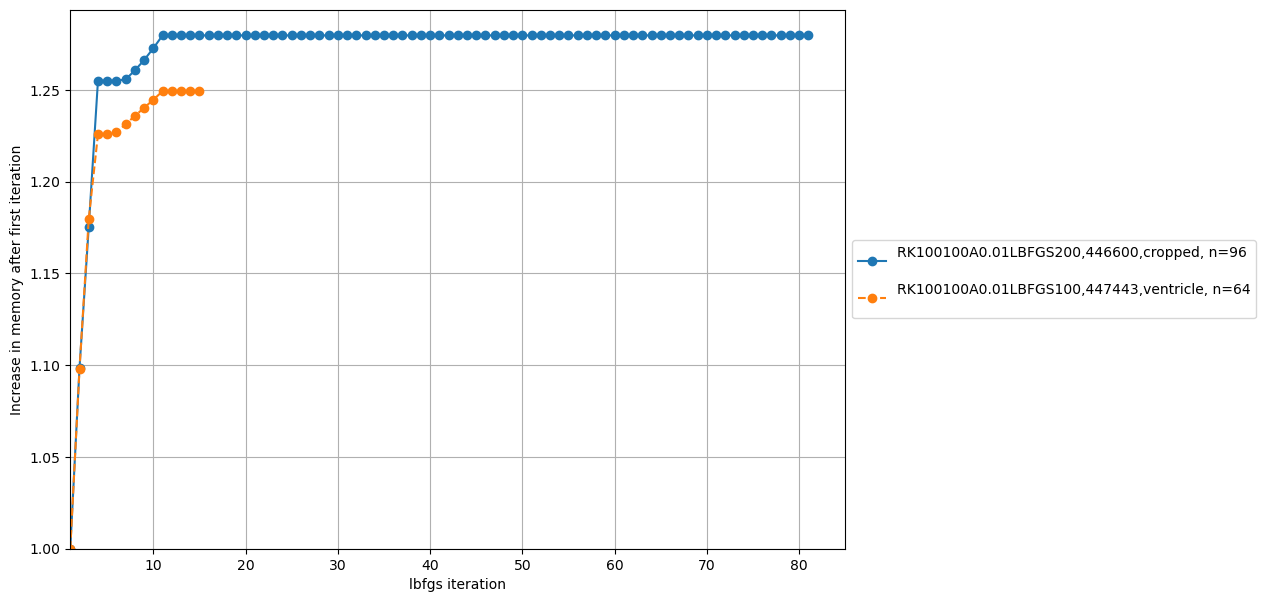

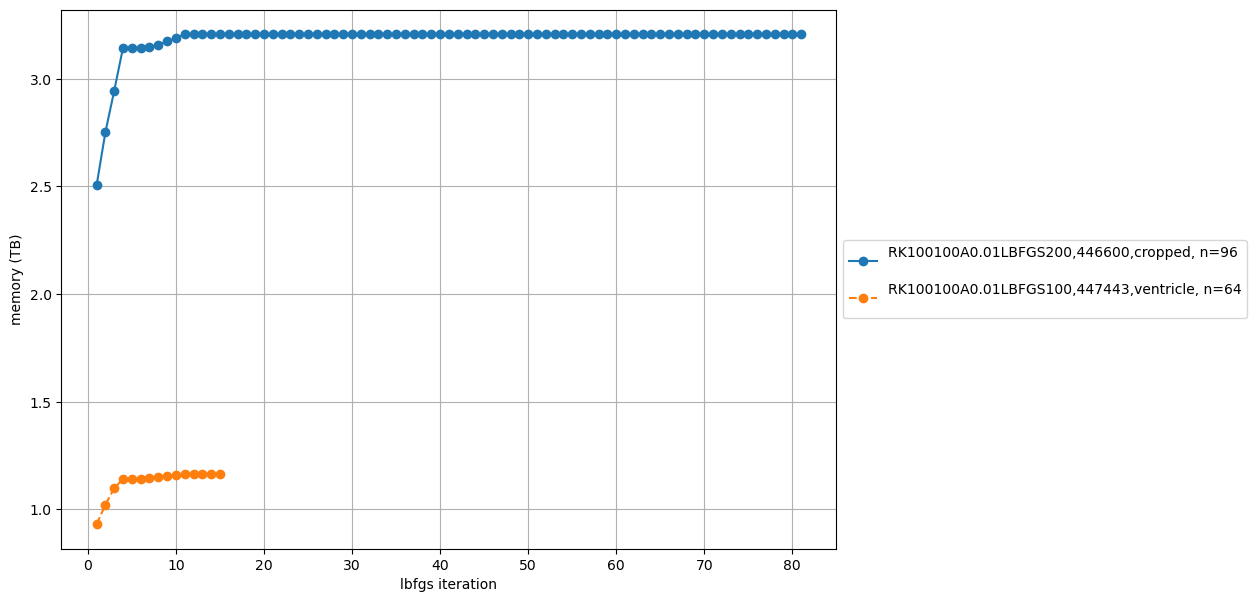

In [3]:
path = pathlib.Path("/home/bastian/D1/registration/mrislurm/")

slurmids = [
            # 444364,
            # 444420, 
            # 444425,
            # 444438,
            # 444509,
            # 444624,
            # 444774,
            # 444925,
            # 444988,
            # 444782,
            # 445273,
            # 445326,
            # 445348,
            # 445351,
            # 445348,
            # 445457,
            #445806, 445829, 445957, 445961, 445962,
            # 446059, 446034, 446058, 
            # 446036,
            # 446145,
            # 446152, 446150, 446180
            446600, 447443,
]



print("Total number of log files", len(slurmids))



fig2 = plt.figure(figsize=(10,7))
ax2 = plt.subplot(111)

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

colors = {1: "darkblue", 2: "blue", 4:"deepskyblue", 8:"slategrey", 10: "k"}

for slurmid in sorted(slurmids):

    try:
        filename = path / (str(slurmid) + "_log_python_srun.txt")
        mema, outfoldername, line_searches, outputfolder = read_memory(filename)

        # hyperparameters = json.load(open(outputfolder.replace("d1", "D1") + "/hyperparameters.json"))
    except FileNotFoundError:
        # continue
        hyperparameters = {"input": ""}
        print("Did not find", slurmid)
        # continue
    try:
        hyperparameters = json.load(open(outputfolder.replace("d1", "D1") + "/hyperparameters.json"))
    except FileNotFoundError:
        continue
    # check_for_error(path / (str(slurmid) + ".out"))
    check(filename)#path / (str(slurmid) + ".out"))

    ntasks = None
    ntasks, maxcor, meshn = read(path / (str(slurmid) + ".out"))

    outfoldername = outfoldername.replace("\n", "").replace(" ", "")

    try:
        mema[:,0]       
        if "optimization_time_hours" in hyperparameters.keys():#["optimization_time_hours"])
            print(slurmid, hyperparameters["optimization_time_hours"], "hours")

    except IndexError:
        print(slurmid, outfoldername, "probably still running init? Continue.")
        continue

    marker = "o"
    linestyle = "-"
    fac2 = mema[np.argmin(np.abs(mema[:, 0]-1)),1]

    label = outfoldername + "," + str(slurmid) #  + ",N=" + str(ntasks)

    color = None

    if "preconditioning" in hyperparameters.keys() and hyperparameters["preconditioning"] == "none":
        # continue
        linestyle = ":"
        label += ",(no preconditioning)"


    if "not_store_solver" in hyperparameters.keys() and hyperparameters["not_store_solver"]:
        # continue
        linestyle = ":"
        label += ",(not_store_solver)"
    if "mpiwait" in hyperparameters.keys() and hyperparameters["mpiwait"]:
        # continue
        linestyle = ":"
        label += ",(mpiwait)"

    if "/home/bastian/d1/registration/" in hyperparameters["logfile"]:
        label += "(singularity)"
        marker = "x"


    if "RK" in outfoldername:
        color = "r"
    else:
        color = "g"

    if "coarsecropped" in hyperparameters["input"]:
        # color = "b"
        label += ",coarse"

    elif "cropped" in hyperparameters["input"]:
        color = "c"
        label += ",cropped"
    elif "affine" in hyperparameters["input"]:
        color = "m"
        label += ",affine-rotated"
    elif "ventricle" in hyperparameters["input"]:
        linestyle = "--"
        label += ",ventricle"

    color = None


    label += ", n=" + str(ntasks)

    label = label.replace("RK", "RK"+str(int(hyperparameters["max_timesteps"])))

    line = plt.plot(mema[:,0], mema[:,1], marker=marker, linestyle=linestyle, color=color,
            label=label,
            )

    color = line[-1].get_color()
    ax2.plot(mema[:,0], mema[:,1] / fac2, marker=marker, linestyle=linestyle, color=color, label=label,)
    


plt.xlabel("lbfgs iteration")
ax2.set_xlabel("lbfgs iteration")
ax.set_ylabel("memory (TB)")
ax2.set_xlim(1, None)
ax2.set_ylim(1, None)
ax2.set_ylabel("Increase in memory after first iteration")
# ax2.set_xlim(1, None)
# plt.xlim(1, None)
# plt.xticks(list(range(1, int(plt.gca().get_xlim()[1]))))
ax.grid()
ax2.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [4]:

for slurmid in range(440221, 440674):
    try:
        filename = path / (str(slurmid) + "_log_python_srun.txt")
        mema, outfoldername, line_searches, outputfolder = read_memory(filename)

        hyperparameters = json.load(open(outputfolder + "/hyperparameters.json"))
    except FileNotFoundError:
        continue

    if "not_store_solver" in hyperparameters.keys() and hyperparameters["not_store_solver"]:
        print(slurmid)
        